In [1]:
import numpy as np
import pandas as pd

import pandas_datareader.data as web

from sklearn.model_selection import TimeSeriesSplit

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
y = web.DataReader(name='GS10', data_source='fred', start='2000-01')

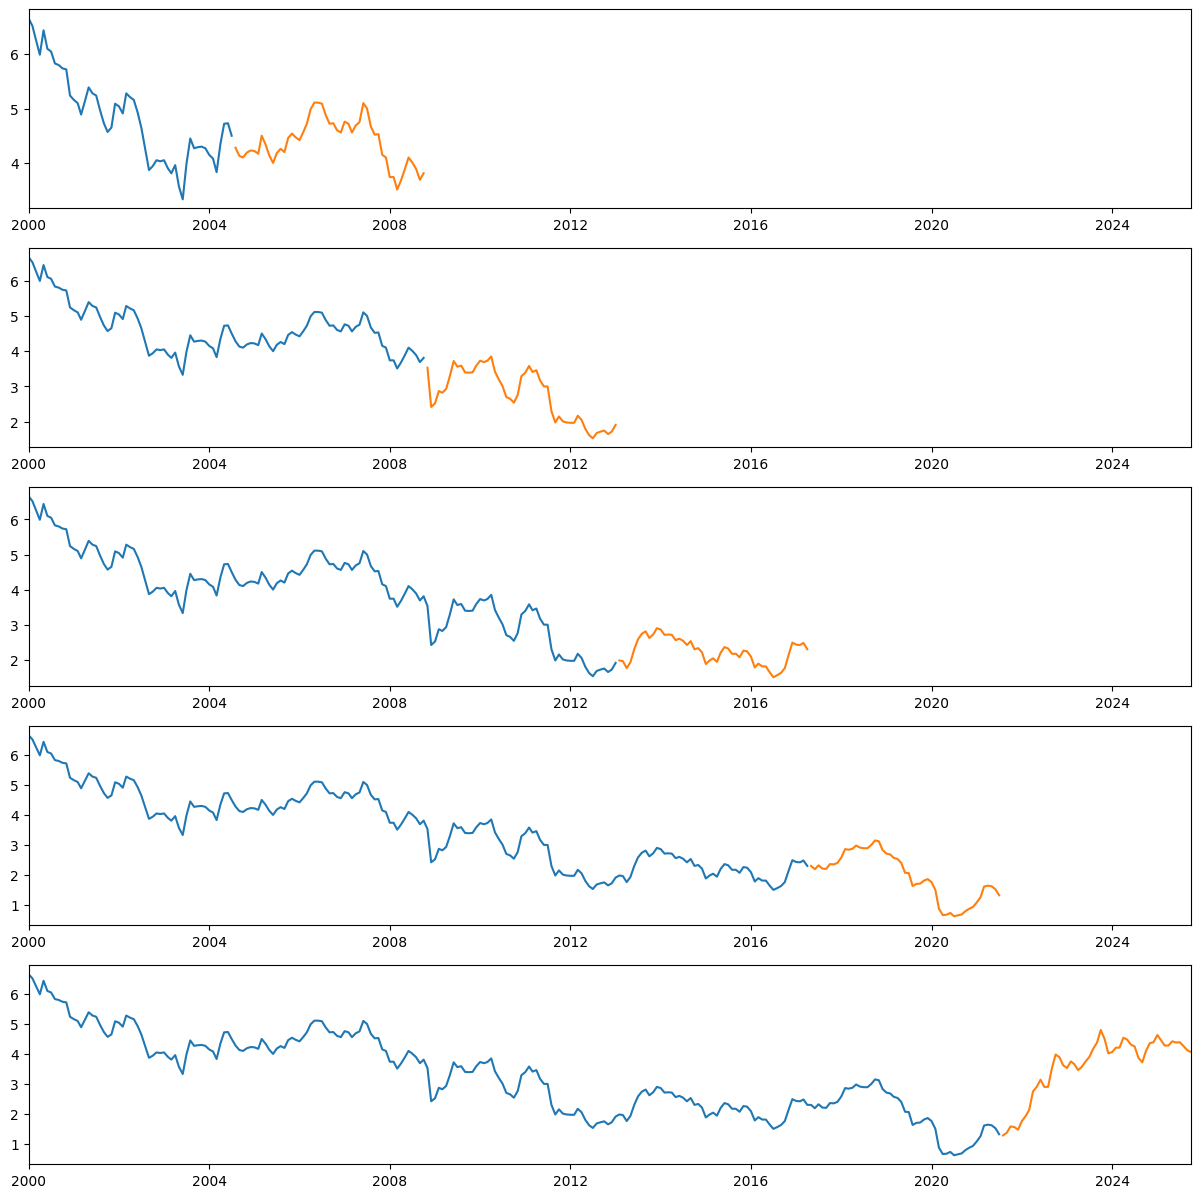

In [3]:
N_SPLITS = 5

folds = TimeSeriesSplit(n_splits=N_SPLITS)

fig, axs = plt.subplots(nrows=N_SPLITS, ncols=1, figsize=(15, 3*N_SPLITS))

for i, (train_index, valid_index) in enumerate(folds.split(y)):
	axs[i].set_xlim(left=y.index[0], right=y.index[-1])
	axs[i].plot(y.iloc[train_index])
	axs[i].plot(y.iloc[valid_index])


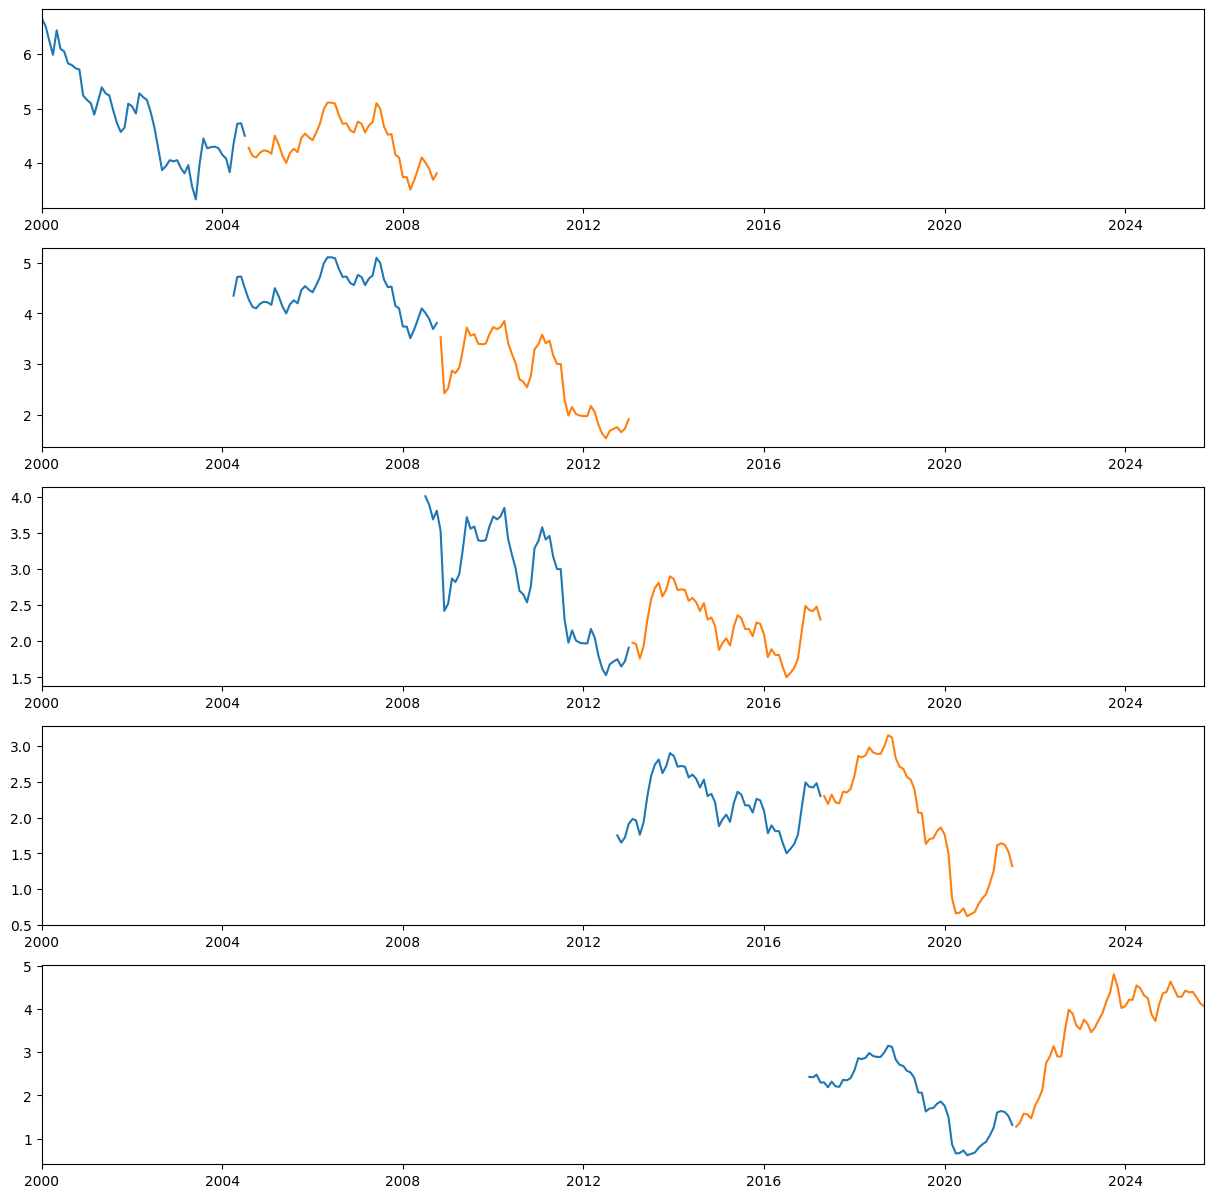

In [4]:
N_SPLITS = 5

folds = TimeSeriesSplit(n_splits=N_SPLITS)

fig, axs = plt.subplots(nrows=N_SPLITS, ncols=1, figsize=(15, 3*N_SPLITS))

start_train=0

for i, (train_index, valid_index) in enumerate(folds.split(y)):
	axs[i].set_xlim(left=y.index[0], right=y.index[-1])
	axs[i].plot(y.iloc[train_index[start_train:]])
	axs[i].plot(y.iloc[valid_index])
	start_train = start_train+len(valid_index)